In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt

from floquet_simulations.plot_functions import PlotParams
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

PlotParams()

def GaugeFix(evecs):
    for vec in range(len(evecs[0])):
        if evecs[0,vec] < 0:
            evecs[:,vec] = -evecs[:,vec]
    return evecs

#SSS
def PlotRealHam(Ham, figsize=(6, 6)):
    cm_unit = 1/2.54
    colourbar_absmax = np.max([np.abs(np.min(Ham)), np.max(Ham)])

    # axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
    # data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)
    norm = mpl.colors.Normalize(vmin=-colourbar_absmax, vmax=colourbar_absmax)
    cmap = mpl.colors.LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)

    bbox_colourbar_anchor = (0.9, 0.57, 1, 0.73)

    fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
    pcm = ax.matshow(np.real(Ham), interpolation='none', cmap=cmap,  norm=norm)
    ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
            labeltop=False, direction = "in", length = 3, pad=2)  
    ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
            labelright=False, direction = "in", length = 3, pad=2)  

    ax.set_ylabel('$i$', rotation=0)
    # ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
    # ax.set_yticks(axes_tick_pos)
    # ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

    ax.set_xlabel("$j$")
    # ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
    # ax.set_xticks(axes_tick_pos)
    # ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

    # ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')

    # new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
    # new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
    axins = inset_axes(
        ax,
        width="5%",  # width: 5% of parent_bbox width
        height="50%",  # height: 50%
        loc="lower left",
        bbox_to_anchor=bbox_colourbar_anchor,
        bbox_transform=ax.transAxes,
        borderpad=0,
    )
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=axins, 
                        # ticks=colourbar_ticks,
                          ticklocation="left")
    cbar.ax.tick_params(labelsize=12*0.7, pad=0)
    # fig.savefig(save_fig_dir/"strob_ham_single_site_shake.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
    plt.show()

    # Build matrix
def BuildMatrix(N, Js, J_indices):
    assert(len(Js) == len(J_indices))
    Ham = np.zeros((N, N))
    for index in range(len(J_indices)):
        for (i, j) in J_indices[index]:
            Ham[i, j] = Js[index]; Ham[j, i] = Js[index]
    return Ham

# Simulate 8x8 Ham

In [2]:
n = 8
# give tunnelling element locations
J1_ind = [(27, 1), (28,n), (27,n), (35, 1)]
J2_ind = [(19, n), (20,n), (28, 1), (36, 1), 
          (36, n), (35, n), (34, 1), (26, 1)]
J3_ind = [(19, 1), (29, n), (43, 1), (26, n)]
J4_ind = [(12, n), (20, 1), (21, n), (29, 1), 
          (37, 1), (37, n), (44, 1), (44, n), 
          (43, n), (42, 1), (34, n), (33, 1), 
          (25, 1), (18,n), (18, 1), (11, n)]
J5_ind = [(11, 1), (30, n), (51, 1), (25, n)]
J6_ind = [(4, n), (12, 1), (13, n), (21, 1), 
          (22, n), (30, 1), (38, 1), (38, n), 
          (45, 1), (45, n), (52, 1), (52, n), 
          (51, n), (50, 1), (42, n), (41, 1), 
          (33, n), (32, 1), (24, 1), (17, n), 
          (17, 1), (10, n), (10, 1), (3, n)]
J7_ind = [(3, 1), (31, n), (59, 1), (24, n)]
J8_ind = [(4, 1), (5, n), (13, 1), (14, n),
          (22, 1), (23, n), (39, n), (46, 1),
          (46, n), (53, 1), (53, n), (60, 1),
          (58, 1), (50, n), (49, 1), (41, n),
          (40, 1), (32, n), (16, n), (16, 1),
          (9, n), (9, 1), (2, n), (2, 1)]
J9_ind = [(5, 1), (6, n), (14, 1), (15, n),
          (47, n), (54, 1), (54, n), (61, 1),
          (57,1), (49, n), (48, 1), (40, n),
          (8, n), (8, 1), (1, n), (1, 1)]
J10_ind = [(0, 1), (6, 1), (7, n), (55, n),
           (62, 1), (56, 1), (48, n), (0, n)]

J1_ind_num = [(i, i+j) for (i, j) in J1_ind]
J2_ind_num = [(i, i+j) for (i, j) in J2_ind]
J3_ind_num = [(i, i+j) for (i, j) in J3_ind]
J4_ind_num = [(i, i+j) for (i, j) in J4_ind]
J5_ind_num = [(i, i+j) for (i, j) in J5_ind]
J6_ind_num = [(i, i+j) for (i, j) in J6_ind]
J7_ind_num = [(i, i+j) for (i, j) in J7_ind]
J8_ind_num = [(i, i+j) for (i, j) in J8_ind]
J9_ind_num = [(i, i+j) for (i, j) in J9_ind]
J10_ind_num = [(i, i+j) for (i, j) in J10_ind]

# Sanity check: no duplications, correct number of tunnelling elements specified
Js_ind = J1_ind_num + J2_ind_num + J3_ind_num + J4_ind_num + J5_ind_num + J6_ind_num + J7_ind_num + J8_ind_num + J9_ind_num + J10_ind_num
Js_ind_sort = sorted(Js_ind)
print([item for item, count in collections.Counter(Js_ind).items() if count > 1])
print(len(Js_ind), len(Js_ind_sort), 2*7*8)


[]
112 112 112


In [3]:
# Build 8x8 matrix
# H8 = np.zeros((8*8, 8*8))
# J1 = -7; J2 = -6; J3 = -5; J4 = -4
# J5 = -3; J6 = -2; J7 = -1; J8 = 1
# J9 = 3; J10  = 4

# J1 = -1; J2 = -2; J3 = -3; J4 = -4
# J5 = -5; J6 = -6; J7 = -7; J8 = -8
# J9 = -9; J10  = -10

J1= -0.30657 
J2= -0.28776 
J3= -0.26736 
J4= -0.17276
J5= -0.05776
J6= -0.05776
J7= -0.05776 
J8= 0.05724 
J9= 0.17224 
J10= 0.28724


H8 = 10*BuildMatrix(8*8, [J1, J2, J3, J4, J5, J6, J7, J8, J9, J10],
                    [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
                     J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num])


#### Create 4x4 simulating 8x8 matrx


In [4]:
J1_ind_num = []
J2_ind_num = [(8, 12), (12, 13)]
J3_ind_num = [(13, 8)]
J4_ind_num = [(4, 8), (8, 9), (9, 13), (13, 14)]
J5_ind_num = [(14, 4)]
J6_ind_num = [(0, 4), (4, 5), (5, 9), (9, 10), (10, 14), (14, 15)]
J7_ind_num = [(15, 0)]
J8_ind_num = [(0, 1), (1, 5), (5, 6), (6, 10), (10, 11), (11, 15)]
J9_ind_num = [(1, 2), (2, 6), (6, 7), (7, 11)]
J10_ind_num = [(2, 3), (3, 7)]

#Sanity check
Js_ind = J1_ind_num + J2_ind_num + J3_ind_num + J4_ind_num + J5_ind_num + J6_ind_num + J7_ind_num + J8_ind_num + J9_ind_num + J10_ind_num
Js_ind_sort = sorted(Js_ind)
print([item for item, count in collections.Counter(Js_ind).items() if count > 1])
print(len(Js_ind), len(Js_ind_sort), 2*3*4+3)

[]
27 27 27


In [5]:
# Build matrix
H4 = 10*BuildMatrix(4*4, [J1, J2, J3, J4, J5, J6, J7, J8, J9, J10],
                    [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
                     J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num])



#### Compare 4x4 and real 8x8 Hams

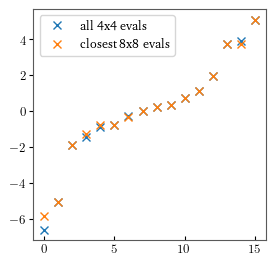

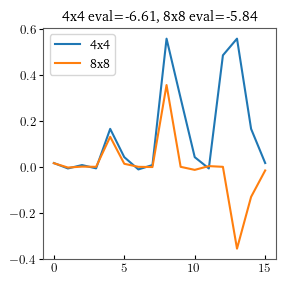

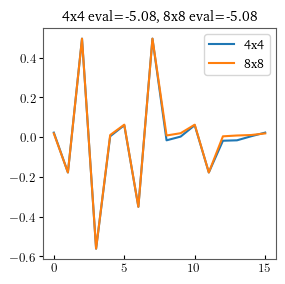

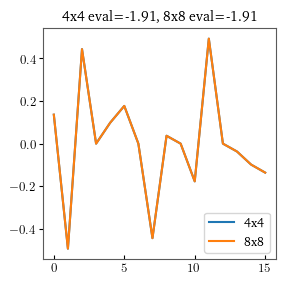

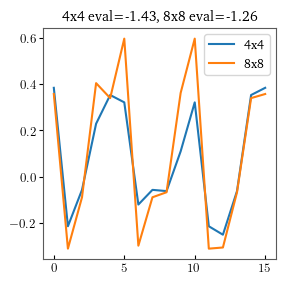

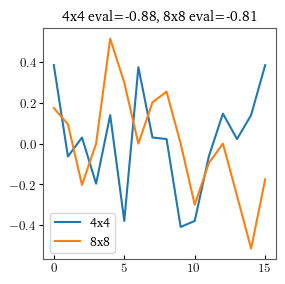

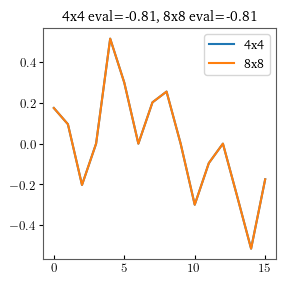

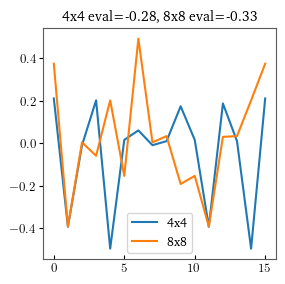

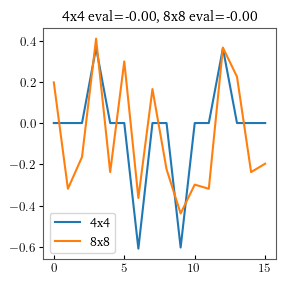

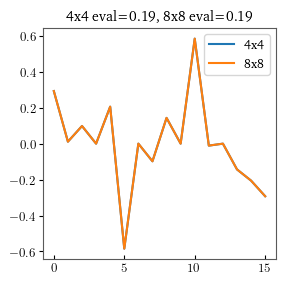

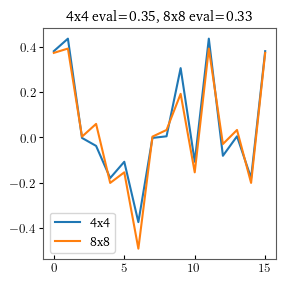

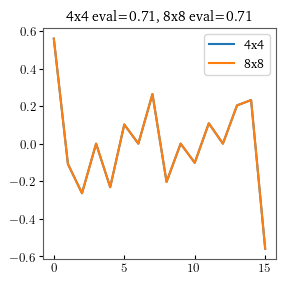

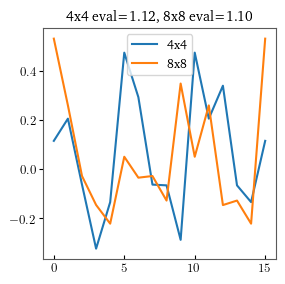

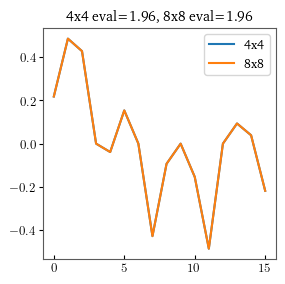

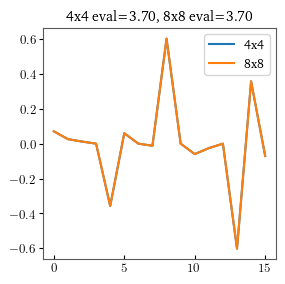

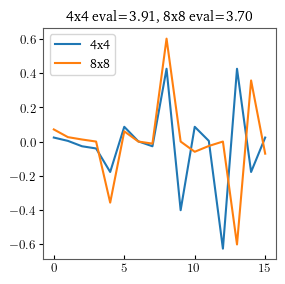

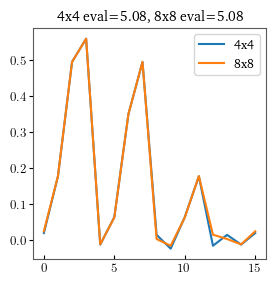

In [6]:
evals4, evecs4 = np.linalg.eigh(H4)
evals8, evecs8 = np.linalg.eigh(H8)
evecs8 = GaugeFix(evecs8)
evecs4 = GaugeFix(evecs4)

top_right_quarter_ind = [4, 5, 6, 7, 12, 13, 14, 15, 20, 21, 22, 23, 28, 29, 30, 31]

evecs8_trq = evecs8[top_right_quarter_ind, :]
evecs8_trq = GaugeFix(evecs8_trq)
corresponding_evals_ind = []
for eval in evals4:
    corresponding_evals_ind.append(np.abs(evals8 - eval).argmin())

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(range(16), evals4, 'x', label="all 4x4 evals")
ax.plot(range(16), evals8[corresponding_evals_ind], 'x', label="closest 8x8 evals")
ax.legend()
plt.show()


for H4_eval_ind in range(16):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.plot(range(16), evecs4[:,H4_eval_ind], label='4x4')
    ax.set_title(f"4x4 eval={evals4[H4_eval_ind]:.2f}, 8x8 eval={evals8[corresponding_evals_ind[H4_eval_ind]]:.2f}")
    ax.plot(range(16), evecs8_trq[:,corresponding_evals_ind[H4_eval_ind]]*2, label="8x8")
    ax.legend()
    # ax.plot(range(16), evecs8[top_right_quarter_ind, corresponding_evals_ind[H4_eval_ind]]*2)
    plt.show()




# Simulate 7x7 Ham

In [7]:
n = 7
J1_ind = [(24, 1), (24,n), (24,-n), (24, -1)]
J2_ind = [(17, 1), (18,n), (25, n), (31, 1), 
          (30, 1), (23, n), (16, n), (16, 1)]
J3_ind = [(10, n), (25, 1), (31, n), (22, 1)]
J4_ind = [(11, n), (18, 1), (32, 1), (32, n), 
          (30, n), (30, -1), (15, 1), (9, n)]
J5_ind = [(10, 1), (19, n), (26, n), (38, 1),
          (37, 1), (22, n), (15, n), (9, 1)]
J6_ind = [(11, 1), (12, n), (33, n), (39, 1), 
          (36, 1), (29, n), (8, n), (8, 1)]
J7_ind = [(3, n), (26, 1), (38, n), (21, 1)]
J8_ind = [(4, n), (19, 1), (33, 1), (39, n),
          (37, n), (28, 1), (14, 1), (2, n)]
J9_ind = [(5, n), (12, 1), (40, 1), (40, n),
          (36, n), (35, 1), (7, 1), (1, n)]
J10_ind = [(3, 1), (20, n), (27, n), (45, 1),
           (44, 1), (21, n), (14, n), (2, 1)]
J11_ind = [(4, 1), (13, n), (34, n), (46, 1),
           (43, 1), (28, n), (7, n), (1, 1)]
J12_ind = [(5, 1), (6, n), (41, n), (47, 1),
           (42, 1), (35, n), (0, n), (0, 1)]

J1_ind_num = [(i, i+j) for (i, j) in J1_ind]
J2_ind_num = [(i, i+j) for (i, j) in J2_ind]
J3_ind_num = [(i, i+j) for (i, j) in J3_ind]
J4_ind_num = [(i, i+j) for (i, j) in J4_ind]
J5_ind_num = [(i, i+j) for (i, j) in J5_ind]
J6_ind_num = [(i, i+j) for (i, j) in J6_ind]
J7_ind_num = [(i, i+j) for (i, j) in J7_ind]
J8_ind_num = [(i, i+j) for (i, j) in J8_ind]
J9_ind_num = [(i, i+j) for (i, j) in J9_ind]
J10_ind_num = [(i, i+j) for (i, j) in J10_ind]
J11_ind_num = [(i, i+j) for (i, j) in J11_ind]
J12_ind_num = [(i, i+j) for (i, j) in J12_ind]

# Check it works
Js_ind = J1_ind_num + J2_ind_num + J3_ind_num + J4_ind_num + J5_ind_num + J6_ind_num + J7_ind_num + J8_ind_num + J9_ind_num + J10_ind_num + J11_ind_num + J12_ind_num
Js_ind_sort = sorted(Js_ind)
print([item for item, count in collections.Counter(Js_ind).items() if count > 1])
print(len(Js_ind), len(Js_ind_sort), 2*7*6)


[]
84 84 84


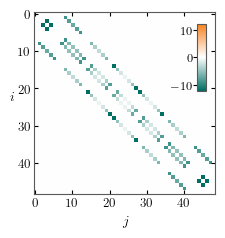

In [8]:
# Build matrix
H7 = np.zeros((7*7, 7*7))
J1 = -1; J2 = -2; J3 = -3; J4 = -4
J5 = -5; J6 = -6; J7 = -7; J8 = -8
J9 = -9; J10  = -10; J11 =-11; J12 = -12
for (i, j) in J1_ind_num:
    H7[i, j] = J1; H7[j, i] = J1
for (i, j) in J2_ind_num:
    H7[i, j] = J2; H7[j, i] = J2
for (i, j) in J3_ind_num:
    H7[i, j] = J3; H7[j, i] = J3
for (i, j) in J4_ind_num:
    H7[i, j] = J4; H7[j, i] = J4
for (i, j) in J5_ind_num:
    H7[i, j] = J5; H7[j, i] = J5
for (i, j) in J6_ind_num:
    H7[i, j] = J6; H7[j, i] = J6
for (i, j) in J7_ind_num:
    H7[i, j] = J7; H7[j, i] = J7
for (i, j) in J8_ind_num:
    H7[i, j] = J8; H7[j, i] = J8
for (i, j) in J9_ind_num:
    H7[i, j] = J9; H7[j, i] = J9
for (i, j) in J10_ind_num:
    H7[i, j] = J10; H7[j, i] = J10
for (i, j) in J10_ind_num:
    H7[i, j] = J11; H7[j, i] = J11
for (i, j) in J10_ind_num:
    H7[i, j] = J12; H7[j, i] = J12

PlotRealHam(H7)

#### Use 13 points to simulate 7x7

In [9]:
# using 13 points
J1_ind_num = [(12, 8)]
J2_ind_num = [(8, 9)]
J3_ind_num = [(4, 8)]
J4_ind_num = [(5, 9), (9, 10)]
J5_ind_num = [(4, 5), (10, 4)]
J6_ind_num = [(5, 6), (6, 10)]
J7_ind_num = [(0, 4)]
J8_ind_num = [(1, 5),(10,11)]
J9_ind_num = [(2, 6), (6, 7)]
J10_ind_num = [(0, 1), (11, 0)]
J11_ind_num = [(1, 2), (7, 11)]
J12_ind_num = [(2, 3), (3, 7)]

#Sanity check
Js_ind = J1_ind_num + J2_ind_num + J3_ind_num + J4_ind_num + J5_ind_num + J6_ind_num + J7_ind_num + J8_ind_num + J9_ind_num + J10_ind_num + J11_ind_num + J12_ind_num
Js_ind_sort = sorted(Js_ind)
print([item for item, count in collections.Counter(Js_ind).items() if count > 1])
print(len(Js_ind), len(Js_ind_sort), 20)

[]
20 20 20


In [10]:
# Build matrix
H4_v1 = np.zeros((13, 13))

for (i, j) in J1_ind_num:
    H4_v1[i, j] = J1; H4_v1[j, i] = J1
for (i, j) in J2_ind_num:
    H4_v1[i, j] = 0.5*J2; H4_v1[j, i] = .5*J2
for (i, j) in J3_ind_num:
    H4_v1[i, j] = J3; H4_v1[j, i] = J3
for (i, j) in J4_ind_num:
    H4_v1[i, j] = J4; H4_v1[j, i] = J4
for (i, j) in J5_ind_num:
    H4_v1[i, j] = J5; H4_v1[j, i] = J5
for (i, j) in J6_ind_num:
    H4_v1[i, j] = J6; H4_v1[j, i] = J6
for (i, j) in J7_ind_num:
    H4_v1[i, j] = J7; H4_v1[j, i] = J7
for (i, j) in J8_ind_num:
    H4_v1[i, j] = J8; H4_v1[j, i] = J8
for (i, j) in J9_ind_num:
    H4_v1[i, j] = J9; H4_v1[j, i] = J9
for (i, j) in J10_ind_num:
    H4_v1[i, j] = J10; H4_v1[j, i] = J10
for (i, j) in J11_ind_num:
    H4_v1[i, j] = J10; H4_v1[j, i] = J11
for (i, j) in J12_ind_num:
    H4_v1[i, j] = J10; H4_v1[j, i] = J12

#### Compare 8x8 and 4x4 v1

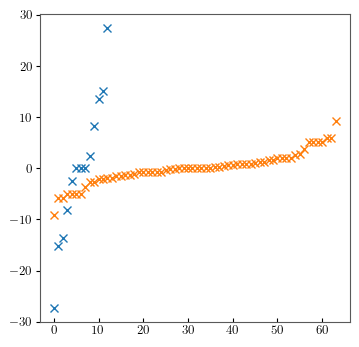

In [11]:
evals4_v1, evecs4_v1 = np.linalg.eigh(H4_v1)
evals8, evecs8 = np.linalg.eigh(H8)
evecs8 = GaugeFix(evecs8)
evecs4_v1 = GaugeFix(evecs4_v1)

top_right_quarter_ind = [3, 4, 5, 6, 10, 11, 12, 13, 17, 18, 19, 20, 24]

evecs8_trq = evecs8[top_right_quarter_ind, :]
evecs8_trq = GaugeFix(evecs8_trq)
# corresponding_evals_ind = [3, 4, 11, 15, 19, 22, 23, 26, 61]
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(range(len(evals4_v1)), evals4_v1, 'x')
ax.plot(range(len(evals8)), evals8, 'x')
plt.show()


# for H4_eval_ind in range(9):

#     fig, ax = plt.subplots(figsize=(4,4))
#     ax.plot(range(16), evecs4[:,H4_eval_ind], label='4x4')
#     ax.plot(range(16), evecs8_trq[:,corresponding_evals_ind[H4_eval_ind]]*2, label="8x8")
#     ax.legend()
#     # ax.plot(range(16), evecs8[top_right_quarter_ind, corresponding_evals_ind[H4_eval_ind]]*2)
#     plt.show()




#### v2

In [12]:
# using 9 points
J1_ind_num = [(7, 9)]
J2_ind_num = [(7, 8)]
J3_ind_num = [(4, 7)]
J4_ind_num = [(5, 8)]
J5_ind_num = [(4, 5)]
J6_ind_num = [(5, 6)]
J7_ind_num = [(0, 4)]
J8_ind_num = [(1, 5)]
J9_ind_num = [(2, 6)]
J10_ind_num = [(0, 1)]
J11_ind_num = [(1, 2)]
J12_ind_num = [(2, 3)]

#Sanity check
Js_ind = J1_ind_num + J2_ind_num + J3_ind_num + J4_ind_num + J5_ind_num + J6_ind_num + J7_ind_num + J8_ind_num + J9_ind_num + J10_ind_num + J11_ind_num + J12_ind_num
Js_ind_sort = sorted(Js_ind)
print([item for item, count in collections.Counter(Js_ind).items() if count > 1])
print(len(Js_ind), len(Js_ind_sort), 12)

[]
12 12 12


In [13]:
# Build matrix
H4_v2 = np.zeros((10, 10))

for (i, j) in J1_ind_num:
    H4_v2[i, j] = J1; H4_v2[j, i] = J1
for (i, j) in J2_ind_num:
    H4_v2[i, j] = 2*J2; H4_v2[j, i] = 2*J2
for (i, j) in J3_ind_num:
    H4_v2[i, j] = 2*J3; H4_v2[j, i] = 2*J3
for (i, j) in J4_ind_num:
    H4_v2[i, j] = 2*J4; H4_v2[j, i] = 2*J4
for (i, j) in J5_ind_num:
    H4_v2[i, j] = 2*J5; H4_v2[j, i] = 2*J5
for (i, j) in J6_ind_num:
    H4_v2[i, j] = 2*J6; H4_v2[j, i] = 2*J6
for (i, j) in J7_ind_num:
    H4_v2[i, j] = 2*J7; H4_v2[j, i] = 2*J7
for (i, j) in J8_ind_num:
    H4_v2[i, j] = 2*J8; H4_v2[j, i] = 2*J8
for (i, j) in J9_ind_num:
    H4_v2[i, j] = 2*J9; H4_v2[j, i] = 2*J9
for (i, j) in J10_ind_num:
    H4_v2[i, j] = 2*J10; H4_v2[j, i] = 2*J10
for (i, j) in J11_ind_num:
    H4_v2[i, j] = 2*J10; H4_v2[j, i] = 2*J11
for (i, j) in J12_ind_num:
    H4_v2[i, j] = 2*J10; H4_v2[j, i] = 2*J12

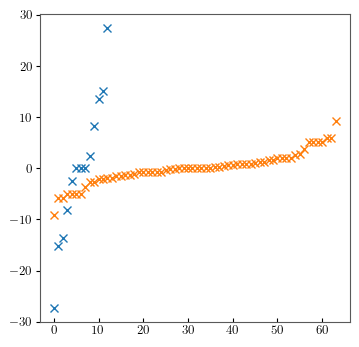

In [14]:
evals4_v2, evecs4_v2 = np.linalg.eigh(H4_v2)
evals8, evecs8 = np.linalg.eigh(H8)
evecs8 = GaugeFix(evecs8)
evecs4_v2 = GaugeFix(evecs4_v2)

# top_right_quarter_ind = [3, 4, 5, 6, 10, 11, 12, 13, 17, 18, 19, 20, 24]

# evecs8_trq = evecs8[top_right_quarter_ind, :]
# evecs8_trq = GaugeFix(evecs8_trq)
# corresponding_evals_ind = [3, 4, 11, 15, 19, 22, 23, 26, 61]
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(range(len(evals4_v1)), evals4_v1, 'x')
ax.plot(range(len(evals8)), evals8, 'x')
plt.show()


# for H4_eval_ind in range(9):

#     fig, ax = plt.subplots(figsize=(4,4))
#     ax.plot(range(16), evecs4[:,H4_eval_ind], label='4x4')
#     ax.plot(range(16), evecs8_trq[:,corresponding_evals_ind[H4_eval_ind]]*2, label="8x8")
#     ax.legend()
#     # ax.plot(range(16), evecs8[top_right_quarter_ind, corresponding_evals_ind[H4_eval_ind]]*2)
#     plt.show()


